# Book Recommendation System

# Collaborative Filtering
### Using KNN

### Import Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

### Read Data

In [32]:
# GoodBooks-10K Data
books = pd.read_csv('books.csv', encoding='ISO-8859-1')
ratings = pd.read_csv('ratings.csv', encoding='ISO-8859-1')

In [33]:
# Show all columns in DataFrame
pd.set_option('display.max_columns', None)

In [34]:
#display the subset of the data
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780000e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780000e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [35]:
books.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.754393e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428246e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780000e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780000e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780000e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790000e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [36]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [37]:
ratings.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


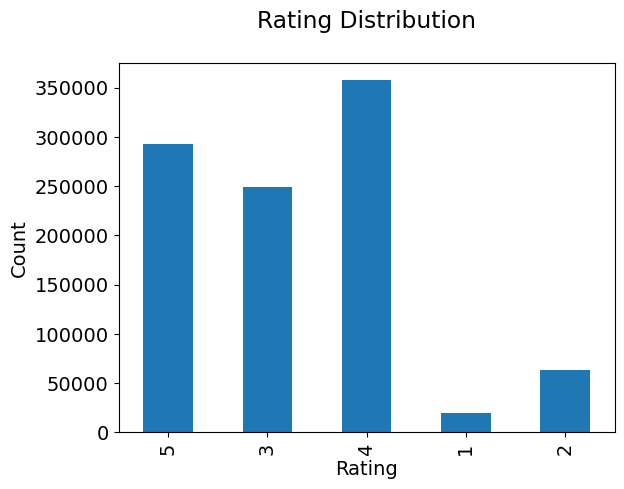

In [38]:
plt.rc("font", size=14)
ratings.rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('Rating_Distribution.png', bbox_inches='tight')
plt.show()

### Clean the data

In [39]:
books = books.dropna()

ratings = ratings.sort_values("user_id")
ratings.drop_duplicates(subset=["user_id","book_id"], keep='first', inplace=True) 
books.drop_duplicates(subset='original_title', keep='first', inplace=True)

##  Using KNN

In [40]:
merged_df = pd.merge(books, ratings, how='left', left_on=['id'], right_on=['book_id'])
df = merged_df[['id','original_title', 'user_id', 'rating']]

df = df.rename(columns = {'id':'book_id'})
df.tail(200)

,book_id,original_title,user_id,rating
763221,9997,Means of Ascent,47460,5
763222,9997,Means of Ascent,47752,5
763223,9997,Means of Ascent,48702,4
763224,9997,Means of Ascent,49224,5
763225,9997,Means of Ascent,50919,5
...,...,...,...,...
763416,9999,Cinderella Ate My Daughter: Dispatches from th...,49753,4
763417,9999,Cinderella Ate My Daughter: Dispatches from th...,50041,4
763418,9999,Cinderella Ate My Daughter: Dispatches from th...,50077,3
763419,9999,Cinderella Ate My Daughter: Dispatches from th...,51095,4


In [41]:
df.describe()

,book_id,user_id,rating
count,763421.000000,763421.000000,763421.000000
mean,4657.948579,25132.161966,3.852257
std,2875.106491,15229.803682,0.980928
min,1.000000,1.000000,1.000000
25%,2123.000000,11843.000000,3.000000
50%,4509.000000,24230.000000,4.000000
75%,7087.000000,38032.000000,5.000000
max,9999.000000,53424.000000,5.000000


In [42]:
ratings_df = df.pivot_table(index='book_id',columns='user_id',values='rating').fillna(0)

pd.set_option('display.max_columns', 100)
ratings_df.tail()

user_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,53375,53376,53377,53378,53379,53380,53381,53382,53383,53384,53385,53386,53387,53388,53389,53390,53391,53392,53393,53394,53395,53396,53397,53398,53399,53400,53401,53402,53403,53404,53405,53406,53407,53408,53409,53410,53411,53412,53413,53414,53415,53416,53417,53418,53419,53420,53421,53422,53423,53424
book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
ratings_df.shape

(7755, 50681)

In [44]:
ratings_matrix = csr_matrix(ratings_df.values)

In [45]:
model_knn = NearestNeighbors(metric='cosine', algorithm = 'brute')
model_knn.fit(ratings_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

### Some Helper Functions

In [46]:
#selecting book id of data set
def get_book_id(book_title):
    target_df = df.loc[df['original_title'] == book_title]
    return target_df['book_id'].iloc[0]

id_TheHungerGames = get_book_id('The Hunger Games')
print(id_TheHungerGames)

1


In [47]:
#selecting title of data set
def get_title(book_id):
    target_df = df.loc[df['book_id'] == book_id]
    return target_df['original_title'].iloc[0]

print(get_title(1))

The Hunger Games


In [48]:
#function to measure distance between data
def get_recomm(book_title, num_neighbors=10, display=False): 
    book_ids = []
    
    query_index = get_book_id(book_title) - 1
    
    if num_neighbors > 0:
        distances, indices = model_knn.kneighbors(ratings_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = num_neighbors + 1)
    else:
        distances, indices = model_knn.kneighbors(ratings_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 10 + 1)
    
    for i in range(0, len(distances.flatten())):
        if display is True:
            if i == 0:
                print('Recommendations for ', book_title, '\n')
            else:    
                print('{0}\t Book ID: {1}\t  Distance: {2}:\n'.format(i, ratings_df.index[indices.flatten()[i]], distances.flatten()[i]))
        
        book_ids.append(ratings_df.index[indices.flatten()[i]])
    
    return book_ids

### Test the Results

In [49]:
# Top 10 recommendations for The Hunger Games

recommendations_for_TheHungerGames = get_recomm('The Hunger Games', num_neighbors=10, display=True)

Recommendations for  The Hunger Games 

1	 Book ID: 17	  Distance: 0.4053256862294832:

2	 Book ID: 31	  Distance: 0.42674642418525066:

3	 Book ID: 2	  Distance: 0.4444738573252147:

4	 Book ID: 20	  Distance: 0.4523031603835689:

5	 Book ID: 3	  Distance: 0.49084774300774026:

6	 Book ID: 93	  Distance: 0.5119913445564398:

7	 Book ID: 5	  Distance: 0.5197672572777041:

8	 Book ID: 16	  Distance: 0.5229117539369219:

9	 Book ID: 9	  Distance: 0.5271915645842881:

10	 Book ID: 37	  Distance: 0.5278079122055651:



In [50]:
for b in recommendations_for_TheHungerGames[1:]:
    print('id:', b, '\t\tBook: ', get_title(b))

id: 17 		Book:  Catching Fire
id: 31 		Book:  The Help
id: 2 		Book:  Harry Potter and the Philosopher's Stone
id: 20 		Book:  Mockingjay
id: 3 		Book:  Twilight
id: 93 		Book:  The Secret Garden
id: 5 		Book:  The Great Gatsby
id: 16 		Book:  MÃ¤n som hatar kvinnor
id: 9 		Book:  Angels & Demons 
id: 37 		Book:  The Lion, the Witch and the Wardrobe


In [51]:
# Top 10 recommendations for The Secret Garden

book_ids_for_H = get_recomm('The Secret Garden', num_neighbors=10)
# skip the first item
for b in book_ids_for_H[1:]:
    print(get_title(b))

Le Comte de Monte-Cristo
The Sun Also Rises
Frankenstein; or, The Modern Prometheus
Moby Dick; or, The Whale
Alice's Adventures in Wonderland
The Adventures of Tom Sawyer
ÐÑÐµÑÑÑÐ¿Ð»ÐµÐ½Ð¸Ðµ Ð¸ Ð½Ð°ÐºÐ°Ð·Ð°Ð½Ð¸Ðµ
Emma
Wuthering Heights
A Tale of Two Cities


In [52]:
# Top 15 recommendations for Nineteen Eighty-Four

book_ids_for_H = get_recomm('Nineteen Eighty-Four', num_neighbors=15)
for b in book_ids_for_H[1:]:
    print(get_title(b))

Animal Farm: A Fairy Story
Pride and Prejudice
Fahrenheit 451
Jane Eyre
Harry Potter and the Philosopher's Stone
MÃ¤n som hatar kvinnor
The Catcher in the Rye
 The Fellowship of the Ring
To Kill a Mockingbird
The Great Gatsby
Lord of the Flies 
Memoirs of a Geisha
Het Achterhuis: Dagboekbrieven 14 juni 1942 - 1 augustus 1944
Of Mice and Men 
Brave New World


In [53]:
#Top 10 recommendations for Brave New World

book_ids_for_H = get_recomm('Brave New World', num_neighbors=10)
for b in book_ids_for_H[1:]:
    print(get_title(b))

Eclipse
New Moon (Twilight, #2)
Harry Potter and the Order of the Phoenix
The Da Vinci Code
Twilight
The Host
Harry Potter and the Chamber of Secrets
Harry Potter and the Half-Blood Prince
The Notebook
Harry Potter and the Deathly Hallows
